# 1. Andmete laadimine ja puhastamine:

Laadi andmestik Panda DataFrame'i


In [ ]:
import pandas as pd

column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race",
    "sex", "capital-gain", "capital-loss", "hours-per-week",
    "native-country", "income"
]

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

data = pd.read_csv(url, names=column_names, na_values=[" ?", '?'], skipinitialspace = True)

data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Laadi andmestik Panda DataFrame'i 2. option (ebatäiuslik)


In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd

adult = fetch_ucirepo(id=2)

data = pd.DataFrame(adult.data.features, columns = adult.data.feature_names)

data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


Käsitle ebaõigeid andmeid


In [ ]:
for x in data.index:
  if data.loc[x, "hours-per-week"] > 84:  # assuming if the number is bigger than 84 - the data is wrong (12h every day)
    data.loc[x, "hours-per-week"] = None
  if data.loc[x, "age"] > 99 or data.loc[x, "age"] < 1:
    data.loc[x, "age"] = None

data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

 nimeta veerud selguse huvides ümber

In [ ]:
data.rename(columns={"fnlwgt": "final-weight"}, inplace=True)
data.rename(columns={"income": "is-income-bigger-than-50K"}, inplace=True)


# 2. Andmete manipuleerimine:

Teisenda andmed sobivasse vormingusse.

In [ ]:
data["is-income-bigger-than-50K"] = data["is-income-bigger-than-50K"].replace({"<=50K": 0, ">50K": 1}).astype(bool)
data[:20]

<ipython-input-5-e9e53a149ada>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["is-income-bigger-than-50K"] = data["is-income-bigger-than-50K"].replace({"<=50K": 0, ">50K": 1}).astype(bool)


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is-income-bigger-than-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,False
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,False
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,False
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45.0,United-States,True
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,True
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40.0,United-States,True


# 3. Andmete uurimine

andmestiku põhistatistikat, struktuuri ja sisu.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29988 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             29988 non-null  int64  
 1   workclass       29988 non-null  object 
 2   fnlwgt          29988 non-null  int64  
 3   education       29988 non-null  object 
 4   education-num   29988 non-null  int64  
 5   marital-status  29988 non-null  object 
 6   occupation      29988 non-null  object 
 7   relationship    29988 non-null  object 
 8   race            29988 non-null  object 
 9   sex             29988 non-null  object 
 10  capital-gain    29988 non-null  int64  
 11  capital-loss    29988 non-null  int64  
 12  hours-per-week  29988 non-null  float64
 13  native-country  29988 non-null  object 
 14  income          29988 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 4.7+ MB


In [ ]:
data.head(11)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45.0,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40.0,United-States,>50K


In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,29988.000000,2.998800e+04,29988.000000,29988.000000,29988.000000,29988.000000
mean,38.425537,1.899028e+05,10.121549,1095.095438,88.241363,40.661931
std,13.133663,1.056531e+05,2.546031,7425.695344,403.816010,11.368144
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177262e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785135e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376255e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,84.000000


In [ ]:
print(data[data["sex"] == "Male"]['capital-gain'].mean())
print(data[data["sex"] == "Female"]['capital-gain'].mean())
print(data[data["race"] == "White"]['capital-gain'].mean())
print(data[data["race"] == "Black"]['capital-gain'].mean())

1334.1917282809611
569.9381635313839
1125.4520666835424
606.24043715847


In [ ]:
data.groupby(["race", "sex"])['capital-gain'].mean().sort_values()

,,capital-gain
race,sex,
Other,Female,254.669725
Black,Female,517.592139
Amer-Indian-Eskimo,Female,544.605042
White,Female,575.268431
Amer-Indian-Eskimo,Male,675.260417
Black,Male,694.490699
Asian-Pac-Islander,Female,780.692754
White,Male,1374.335032
Other,Male,1400.832298


In [ ]:
data.loc[data['is-income-bigger-than-50K'] == True].groupby("education-num").count()["is-income-bigger-than-50K"]

,is-income-bigger-than-50K
education-num,
2,6
3,16
4,39
5,27
6,61
7,60
8,33
9,1662
10,1375




Teisenda andmed sobivasse vormingusse.

In [ ]:
data["is-income-bigger-than-50K"] = data["is-income-bigger-than-50K"].replace({"<=50K": 0, ">50K": 1}).astype(bool)
data[:20]


<ipython-input-53-e9e53a149ada>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["is-income-bigger-than-50K"] = data["is-income-bigger-than-50K"].replace({"<=50K": 0, ">50K": 1}).astype(bool)


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is-income-bigger-than-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,False
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,False
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,False
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45.0,United-States,True
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,True
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40.0,United-States,True


# 4. Andmete visualiseerimine:

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns


Histogrammi, mis näitab vanusejaotust.


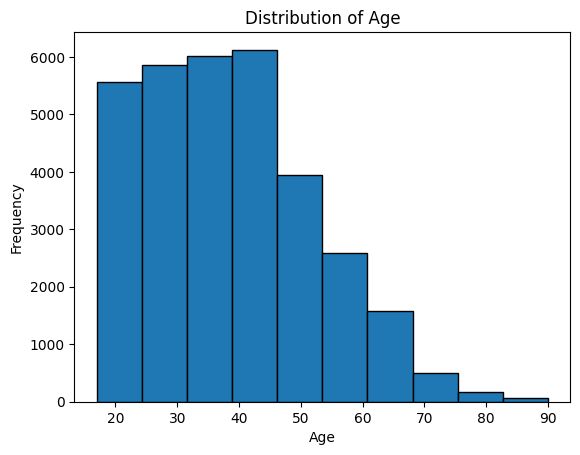

In [ ]:
plt.hist(data['age'], bins = 10, edgecolor = "black")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Tulpdiagrammi, mis võimaldab võrrelda keskmisi töötunde nädalas erinevate ametite lõikes.

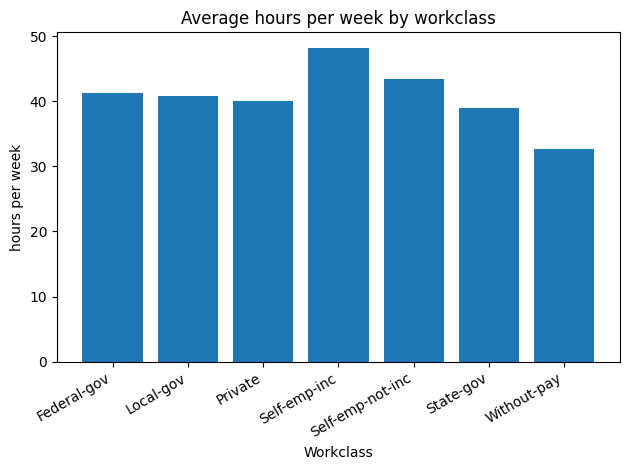

In [ ]:
avg_hpw_by_workclass = data.groupby("workclass")['hours-per-week'].mean()
plt.bar(avg_hpw_by_workclass.index, avg_hpw_by_workclass.values)
plt.xlabel("Workclass")
plt.ylabel("hours per week")
plt.title("Average hours per week by workclass")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

Soojuskaarti (heatmap) numbriliste tunnuste vahelise korrelatsiooni näitamiseks.

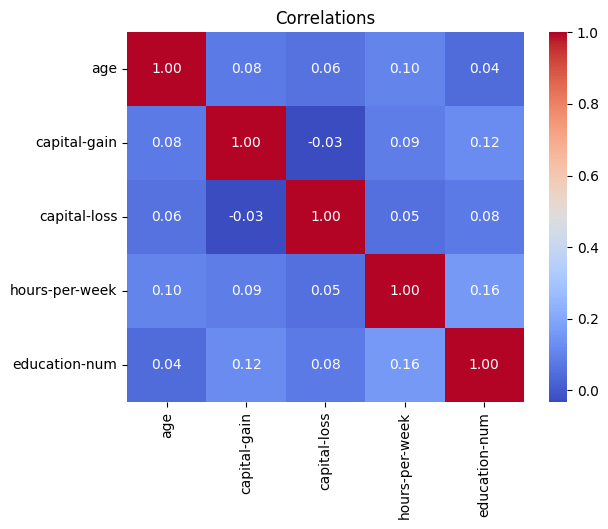

In [ ]:
df = data.loc[:, ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']]
# data
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlations")
plt.show()
# df.corr()
# plt.imshow(df, cmap = "RdYlBu")

Age and hours-per-week distribution in the U.S

<Axes: xlabel='age', ylabel='hours-per-week'>

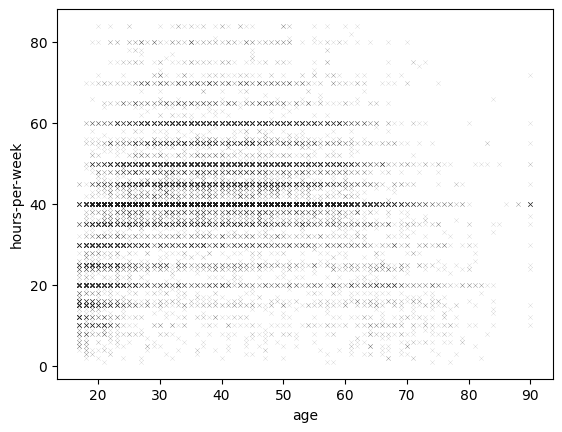

In [ ]:
sns.scatterplot(data=data[data['native-country'] == 'United-States'], x='age', y='hours-per-week', s=10, marker = 'x', color=".12",  alpha=0.2)

Capital-gain distribution by age. Comparing Black and White races

<Axes: xlabel='age', ylabel='capital-gain'>

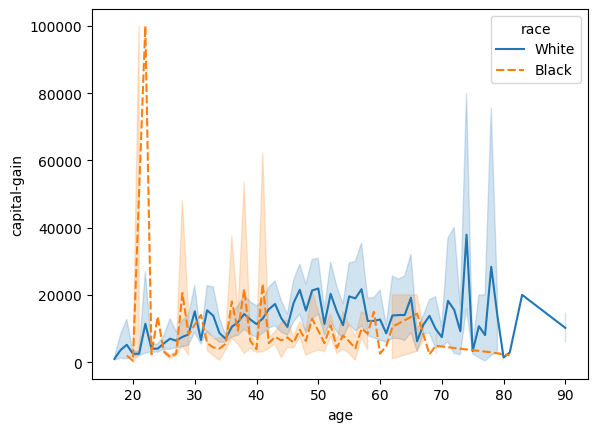

In [ ]:
filtered_data = data[data['capital-gain'] != 0]
filtered_data = filtered_data[filtered_data['race'].isin(['White', 'Black'])]
sns.lineplot(filtered_data, x = filtered_data['age'], y = filtered_data['capital-gain'], hue = 'race', style = 'race')


# 5. Statistika ja analüüs:

Analüüsides 5. tabelit, võib näha, et valge rassi esindajad rikastuvad peamiselt vanemas eas. Võib eeldada, et see on tüüpilise karjääriredelil tõusva investori tee – mida kauem elad, seda rohkem kogud ja teenid. Musta rassi esindajad seevastu on noores eas jõukamad. Seda võib seostada elukutsetega, kus tippvorm on oluline, näiteks sportlased, popstaarid jne.

4 tabeli analüüsi käigus on huvitav märkida, et 40-tunnist töönädalat järgivad peaaegu kõik, olenemata vanusest. Alla 20-aastased töötavad kõige vähem.
Heatmap ei näidanud midagi märkimisväärset – tugevat korrelatsiooni ei leitud.

Üldiselt on seosed üsna tavalised: mida vaesem riik, seda väiksem sissetulek. Huvitav on teada, et rassi "Other" mehed on sissetulekute poolest teisel kohal, samas kui nende naised on viimasel kohal. Tõenäoliselt kujundavad seda statistikat sellised riigid nagu Araabia Ühendemiraadid.